# Image Class Project 2


## Introduction

## Choise of traking algorithm

In [ ]:
!pip install cvzone

In [18]:
import cv2
import cvzone
from cvzone.ColorModule import ColorFinder

# Create the color Finder object
# True : debug mode
myColorFinder = ColorFinder(False)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)]
prediction = False

cap = cv2.VideoCapture("Bouncing ball.mp4")

while True:
    # Grab the image
    success, img = cap.read()
    # Display
    # img = cv2.imread("ball.png")
    # cv2.imshow('img',img)
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    imgContours, contours = cvzone.findContours(img,mask, minArea=200)

    imgColor = cv2.resize(imgColor, (0, 0), None, 0.4, 0.4)
    
    # cv2.imshow("Image with Color", imgColor)
    cv2.imshow("Video ball", imgContours)
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [3]:
import cv2
import cvzone
from cvzone.ColorModule import ColorFinder

# Create the color Finder object
# True : debug mode
myColorFinder = ColorFinder(False)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)]
prediction = False
positionList = []
cap = cv2.VideoCapture("Bouncing ball.mp4")

while True:
    # Grab the image
    success, img = cap.read()
    # Display
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    imgContours, contours = cvzone.findContours(img,mask, minArea=200)

    if contours:
        positionList.append(contours[0]['center'])
    
    for pos in positionList:
        cv2.circle(imgContours, pos, 5, (0, 255, 0), cv2.FILLED)
    imgColor = cv2.resize(imgContours, (0, 0), None, 0.4, 0.4)
    
    # cv2.imshow("Image with Color", imgColor)
    cv2.imshow("Video ball", imgContours)
    cv2.waitKey(50)
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [21]:
import math
import cv2
import cvzone
from cvzone.ColorModule import ColorFinder
import numpy as np

# Initialize the Video
cap = cv2.VideoCapture('Bouncing ball.mp4')

# Create the color Finder object
myColorFinder = ColorFinder(False)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)] # image shpae of x -> 1300x1080
prediction = False

while True:
    
    success, img = cap.read()
    # img = img[0:900, :]
    
    # Display
    img = cv2.resize(img, (0, 0), None, 0.7, 0.7)
    
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    imgContours, contours = cvzone.findContours(img, mask, minArea=500)
    
    if contours:
        posListX.append(contours[0]['center'][0])
        posListY.append(contours[0]['center'][1])
        
    if posListX and posListY: 
        # polunomial regression y = Ax ^ 2 + Bx + C
        A, B, C = np.polyfit(posListX, posListY, 2)
        
        
        for i, (posX, posY) in enumerate(zip(posListX, posListY)):
            pos = (posX, posY)
            cv2.circle(imgContours, pos, 5, (0, 255, 0), cv2.FILLED)
            if i >= 1:
                cv2.line(imgContours, pos, (posListX[i - 1], posListY[i - 1]), (0, 255, 0), 2)
        
        for x in xList:
            y = int(A * x**2 + B * x + C)
            cv2.circle(imgContours, (x, y), 2, (255, 0, 255), cv2.FILLED)
            
        print(posListX)
        if len(posListX) < 10 :
            # Prediction
            a = A
            b = B
            c = C - 590

            x = int((-b - math.sqrt(b ** 2 - (4 * a * c))) / (2 * a))
            # print(x)
            prediction = 100 < x < 150

        if prediction:
            cvzone.putTextRect(imgContours, "Basket", (50, 100),
                               scale=3, thickness=3, colorR=(0, 200, 0), offset=20)
        else:
            cvzone.putTextRect(imgContours, "No Basket", (50, 100),
                               scale=3, thickness=3, colorR=(0, 0, 200), offset=20)
            
    cv2.imshow("Image with countours", imgContours)
    
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(85) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()

C:\Users\alexc\AppData\Local\Temp\ipykernel_33628\10617684.py:38: RankWarning: Polyfit may be poorly conditioned
  A, B, C = np.polyfit(posListX, posListY, 2)
C:\Users\alexc\AppData\Local\Temp\ipykernel_33628\10617684.py:38: RankWarning: Polyfit may be poorly conditioned
  A, B, C = np.polyfit(posListX, posListY, 2)


[468]
[468, 462]


ValueError: math domain error

## Step by step

In [25]:
 
import numpy as np 
import cv2 as cv 
  

In [26]:
# Read the input video 
cap = cv.VideoCapture('Bouncing ball.mp4') 
  
  

In [27]:
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

print(f"Video Resolution: {frame_width}x{frame_height}")


Video Resolution: 1280x720


In [28]:
# take first frame of the 
# video 
ret, frame = cap.read() 

In [29]:
# Manually select ROI
roi = cv.selectROI("Select Tracking Region", frame, fromCenter=False, showCrosshair=True)


In [30]:
roi

(498, 0, 306, 124)

In [31]:
x, y, width, height = roi
track_window = (x, y, width, height) 

In [32]:
 
# set up the Region of 
# Interest for tracking 
roi = frame[y:y + height, x : x + width] 

In [33]:
roi.shape

(124, 306, 3)

In [34]:
import matplotlib.pyplot as plt
def plot_array(fillter):
    plt.imshow(cv.cvtColor(fillter, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

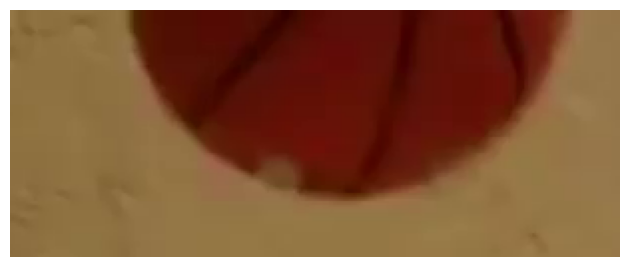

In [35]:
plot_array(roi)

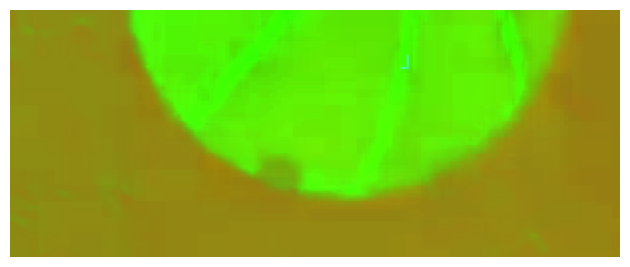

In [36]:
# convert ROI from BGR to 
# HSV format 
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV) 
plot_array(hsv_roi)  

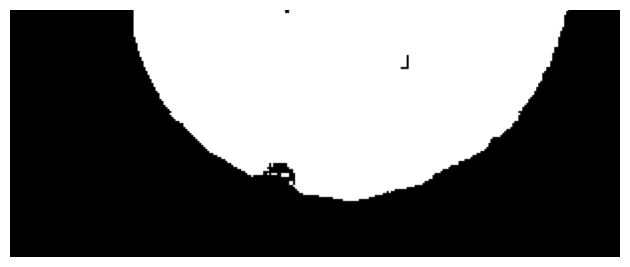

In [37]:
# perform masking operation 
# hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

mask = cv.inRange(hsv_roi, np.array((0., 176., 51.)), np.array((16., 255., 255))) 
plot_array(mask)  

In [38]:


roi_hist = cv.calcHist([hsv_roi],  
                       [0], mask, 
                       [180],  
                       [0, 180]) 
plot_array(roi_hist)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4408.0].


In [39]:
cv.normalize(roi_hist, roi_hist, 
             0, 255, cv.NORM_MINMAX) 

array([[8.38815784e+00],
       [1.77019062e+01],
       [7.01712799e+01],
       [2.55000000e+02],
       [2.41000458e+02],
       [1.07426270e+02],
       [5.07338943e+01],
       [3.65029488e+01],
       [3.60401535e+01],
       [2.15199642e+01],
       [2.25034027e+01],
       [1.11649275e+01],
       [5.20644283e+00],
       [7.75181484e+00],
       [2.37182403e+00],
       [5.78493662e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [40]:
term_crit = ( cv.TERM_CRITERIA_EPS |  
             cv.TERM_CRITERIA_COUNT, 15, 2) 
  

In [41]:

while(1): 
      
    ret, frame = cap.read() 
      
    # Resize the video frames. 
    # frame = cv.resize(frame,  (720, 720), fx = 0, fy = 0, interpolation = cv.INTER_CUBIC) 
      
    cv.imshow('Original', frame) 
  
    # perform thresholding on  
    # the video frames 
    ret1, frame1 = cv.threshold(frame, 
                                180, 155, 
                                cv.THRESH_TOZERO_INV) 
  
    # convert from BGR to HSV 
    # format. 
    hsv = cv.cvtColor(frame1,  
                      cv.COLOR_BGR2HSV) 
  
    dst = cv.calcBackProject([hsv],  
                             [0],  
                             roi_hist,  
                             [0, 180], 1) 
      
    # apply Camshift to get the  
    # new location 
    ret2, track_window = cv.CamShift(dst, 
                                     track_window, 
                                     term_crit) 
  
    # Draw it on image 
    pts = cv.boxPoints(ret2) 
      
    # convert from floating 
    # to integer 
    pts = np.int0(pts) 
  
    # Draw Tracking window on the 
    # video frame. 
    Result = cv.polylines(frame,  
                          [pts],  
                          True,  
                          (0, 255, 255),  
                          2) 
  
    cv.imshow('Camshift', Result) 
  
    # set ESC key as the 
    # exit button. 
    k = cv.waitKey(30) & 0xff
      
    if k == 27: 
        break
          
  
# Release the cap object 
cap.release() 
  
# close all opened windows 
cv.destroyAllWindows() 

C:\Users\alexc\AppData\Local\Temp\ipykernel_6448\2090286810.py:37: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  pts = np.int0(pts)


## Challenges